# Spam Filter

### Intro

When you think of spam messages, what's the first thing that comes to your mind? Maybe random messages trying to sell you something? Or phone calls from outlandish places? Or emails that won't leave you alone? While all of these are classified in our minds as technology spam messages, calls, or emails, the word 'spam' itself has nothing to do with the actual advertising message. It doesn't stand for an acronym about unwanted soliciting or even anything along those lines. In fact, the word 'spam' comes directly from the distasteful canned meat from the 1940s. Spam was commonly used as a food that could be easily transported to areas affected by the wartime struggle of WWII. Because of its practicality, many soon grew tired of it meal after meal, calling it things like "ham that didn't pass its physical" or "meatloaf without basic training."<sup>[1](https://en.wikipedia.org/wiki/Spam_(food))</sup> And thus, the word for this repetitive undesirable meat was eventually transferred to repetitive undesirable messages.

While we could continue discussing the *facinating* history of spam meat, that is not what this short project is about. In this guided project, we will build a filter for spam messages. Just as one might want to eliminate spam meat from their diet, we aim to remove spam messages from our phones. Our objective is to create a function that filters spam messages with an accuracy of over 80%. In other words, we want our filter to accurately identify at least 80% of the messages entered.

For this project, we will use a dataset consisting of 5,572 SMS messages that have already been classified as either spam or non-spam. This dataset was compiled by Tiago A. Almeida and José María Gómez Hidalgo. You can find more information about the dataset or download it [here](https://archive.ics.uci.edu/dataset/228/sms+spam+collection).

Let's begin by importing the necessary libraries and data.

### Exploring the Data

In [1]:
# importing our libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing our data
spam_collection = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['Label', 'SMS'])

# setting our exploration functions to output a larger number of results, larger than the defalt settings
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

# exploring our data
print(spam_collection.shape)
spam_collection.head(10)

(5572, 2)


,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


In [2]:
# resetting our exploration functions to the defalt settings
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')

Based on our results, we can see that our dataset contains 5,572 rows and 2 columns. The messages cover a variety of topics and lengths. In the `Label` column, we observe two unique values: 'spam' and 'ham.' We can infer that 'ham' refers to 'non-spam.' Next, we will calculate the percentage of messages in the dataset that are classified as spam and those that are not. Additionally, we will create a visualization of these percentages to better understand the distribution of the messages.

In [3]:
# calculating the percentages of spam and ham (non-spam)
spam_pct = len(spam_collection[spam_collection['Label'] == 'spam'])/len(spam_collection['Label'])
spam_pct = spam_pct*100
non_spam_pct = len(spam_collection[spam_collection['Label'] == 'ham'])/len(spam_collection['Label'])
non_spam_pct = non_spam_pct*100

print('''{}% of the messages are spam.'''.format(round(spam_pct,2)))
print('''{}% of the messages are not spam.'''.format(round(non_spam_pct,2)))

13.41% of the messages are spam.
86.59% of the messages are not spam.


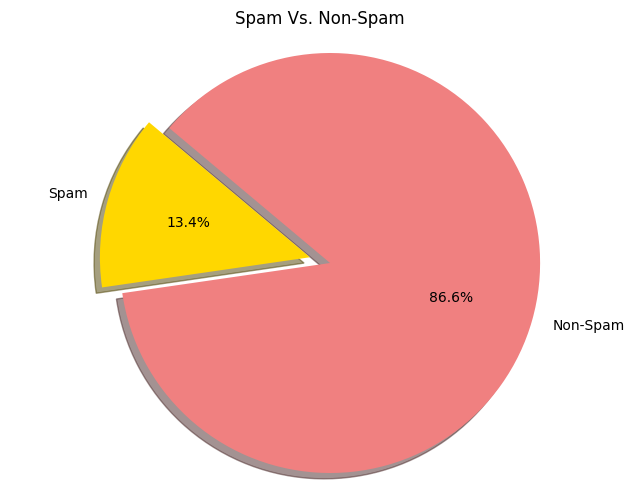

In [4]:
# generating visualization of percentages
labels = ['Spam', 'Non-Spam']
sizes = [spam_pct, non_spam_pct]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  
plt.title('Spam Vs. Non-Spam')
plt.show()

### Training Grounds

Before we can begin building our filter, we need to establish a method for training it. If we build the filter first and organize the training data later, there is a significant risk that our test data will be biased. By "biased," I mean that we might inadvertently choose data that is too easy for the filter to identify. To ensure accurate training of our filter's performance, we need to set aside a completely random set of data in advance. 

To achieve this, we will randomly select a portion of our dataset to use for training the filter. Once the filter is complete, we will conduct its final test using the remaining portion of the reserved data.

- **Training data** (used during the filter's development): approximately 80% of our dataset
- **Testing data** (used after the filter is built): approximately 20% of our dataset

In [5]:
# mixing up the data in our dataset, so we can make our selection randomly
mixed_randomly = spam_collection.sample(frac=1, random_state=1)

# Using the indexing to split the data into 80% and 20%
indexing = round(len(mixed_randomly) * 0.8)
training = mixed_randomly[:indexing].reset_index(drop=True)
testing = mixed_randomly[indexing:].reset_index(drop=True)

# Viewing how much data landed in each set
print('''Training Data: {}'''.format(training.shape))
print('''Testing Data: {}'''.format(testing.shape))

Training Data: (4458, 2)
Testing Data: (1114, 2)


Based on our calculations, the Training Data now contains 4,458 messages, while the Testing Data has 1,114 messages. Next, we need to verify that our random selection has distributed spam and non-spam messages evenly across both sets. Similar to our previous analysis of the entire dataset, we will calculate the percentages of spam and non-spam messages in each set and visualize the results.

13.5% of the Training messages are spam.
86.5% of the Training messages are not spam.
------------------------
13.2% of the Testing messages are spam.
86.8% of the Testing messages are not spam.




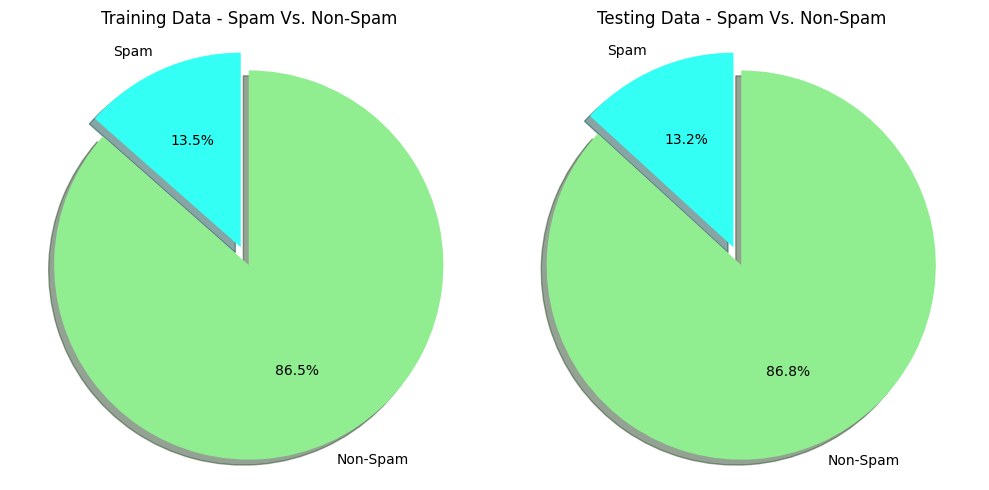

In [6]:
# calculating the percentages of spam and ham (non-spam) in the Training Data
spam_pct_train = len(training[training['Label'] == 'spam'])/len(training['Label'])
spam_pct_train = spam_pct_train*100
non_spam_pct_train = len(training[training['Label'] == 'ham'])/len(training['Label'])
non_spam_pct_train = non_spam_pct_train*100

# calculating the percentages of spam and ham (non-spam) in the Testing Data
spam_pct_test = len(testing[testing['Label'] == 'spam'])/len(testing['Label'])
spam_pct_test = spam_pct_test*100
non_spam_pct_test = len(testing[testing['Label'] == 'ham'])/len(testing['Label'])
non_spam_pct_test = non_spam_pct_test*100

# printing results
print('''{}% of the Training messages are spam.'''.format(round(spam_pct_train,1)))
print('''{}% of the Training messages are not spam.'''.format(round(non_spam_pct_train,1)))
print('------------------------')
print('''{}% of the Testing messages are spam.'''.format(round(spam_pct_test,1)))
print('''{}% of the Testing messages are not spam.'''.format(round(non_spam_pct_test,1)))
print('\n')


# generating visualizations below

labels1 = ['Spam', 'Non-Spam']
sizes1 = [round(spam_pct_train,1), round(non_spam_pct_train,1)]

labels2 = ['Spam', 'Non-Spam']
sizes2 = [round(spam_pct_test,1), round(non_spam_pct_test,1)]

colors = ['#33FFF5', 'lightgreen']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(sizes1, explode=explode, labels=labels1, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Training Data - Spam Vs. Non-Spam')

ax2.pie(sizes2, explode=explode, labels=labels2, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Testing Data - Spam Vs. Non-Spam')

plt.tight_layout()
plt.show()

As shown above, our percentages closely match those of the original dataset. With this confirmed, we can proceed to the next step in building and training our spam message filter. We will use the Naive Bayes algorithm to classify messages as either spam or not spam. Below are the formulas and equations we will utilize, along with explanations of some of the variable definitions:

![Formula Details](formula_details.png "Formula Details")

### Data Cleaning

As shown above, we have equation variables related to the total number of word occurrences and unique words. However, our training dataset only contains two columns: `Label` (indicating whether a message is spam or ham) and `SMS` (the message itself). This raises the question: how can we use our formulas and equations without all the necessary information? To address this, we need to access the needed information by cleaning our dataset. This process involves taking each message, removing all punctuation, and converting all words to lowercase. After that, we will create a column for each unique word in the dataset, with each row indicating the number of times that word appears in each message.

![Dataset Format](dataset_format.png "Dataset Format")

We will start this process by removing all punctuation and converting each letter to lowercase, as shown in the code below.

In [7]:
# Cleaning the training set and printing results
print('Training set before cleaning:')
print(training.head())
print('\n')
print('Training set after cleaning:')
# removing all characters that are not letters or numbers
training['SMS'] = training['SMS'].str.replace(r'[!"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~]', '', regex=True)
# converting all letters to lowercase
training['SMS'] = training['SMS'].str.lower()
print(training.head())

Training set before cleaning:
  Label                                                SMS
0   ham                       Yep, by the pretty sculpture
1   ham      Yes, princess. Are you going to make me moan?
2   ham                         Welp apparently he retired
3   ham                                            Havent.
4   ham  I forgot 2 ask ü all smth.. There's a card on ...


Training set after cleaning:
  Label                                                SMS
0   ham                        yep by the pretty sculpture
1   ham         yes princess are you going to make me moan
2   ham                         welp apparently he retired
3   ham                                             havent
4   ham  i forgot 2 ask ü all smth theres a card on da ...


### Vocabulary

Now that our training data is clean and uniformly formatted, we are ready to create our vocabulary. We will begin by identifying all the unique words in our training dataset and compiling them into a list.

In [8]:
training['SMS'] = training['SMS'].str.split()
vocabulary = []

for row in training['SMS']:
    for word in row:
        vocabulary.append(word)

vocabulary = list(set(vocabulary))
print(len(vocabulary))

8515


With our vocabulary list now complete, containing 8,515 words, we can proceed to convert our training dataset into its completed format. In the code below, we will generate a dictionary that counts the number of vocabulary words present in each message. Next, we will update each row to reflect how many times each word appears in the message. Finally, we will combine all the rows and columns to achieve our final format.

![Final Format](final_format.png "Final Format")

In [9]:
# calculating vocabulary dictionary
word_counts_per_sms = {unique_word: [0] * len(training['SMS']) for unique_word in vocabulary}

for index, sms in enumerate(training['SMS']):
    for word in sms:
        word_counts_per_sms[word][index] += 1

In [10]:
# converting dictionary to dataframe
word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,diwali,078,1month,m227xy,sapna,off,wwwmusictrivianet,better,wenever,wiskey,...,woould,mcr,fakeyes,those,waiting,o2,dont4get2text,81618,onam,galcan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# combining vocabulary dataframe with original training dataset ('Label' and 'SMS')
training_clean = pd.concat([training, word_counts], axis=1)
training_clean.head()

,Label,SMS,diwali,078,1month,m227xy,sapna,off,wwwmusictrivianet,better,...,woould,mcr,fakeyes,those,waiting,o2,dont4get2text,81618,onam,galcan
0,ham,"[yep, by, the, pretty, sculpture]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[yes, princess, are, you, going, to, make, me,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[welp, apparently, he, retired]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,[havent],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[i, forgot, 2, ask, ü, all, smth, theres, a, c...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Variables & Constants

Now that our training data is ready, we can officially start developing the calculations for our spam filter. We will begin by calculating the five variables listed below, as these will be used repeatedly in the formulas.

![Calculations - Pt 1](calculations_pt1.png "Calculations - Pt 1")

In [12]:
# First, let's separate the spam from the non-spam in our training dataset for improved accessibility
spam = training_clean[training_clean['Label'] == 'spam']
ham = training_clean[training_clean['Label'] == 'ham']

# P(Spam)
p_spam = len(spam) / len(training_clean)

# P(Ham)
p_ham = len(ham) / len(training_clean)

# N_Spam
words_per_spam_mesg = spam['SMS'].apply(len)
n_spam = words_per_spam_mesg.sum()

# N_Ham
words_per_ham_mesg = ham['SMS'].apply(len)
n_ham = words_per_ham_mesg.sum()

# N_Vocabulary
n_vocabulary = len(vocabulary)

# Laplace smoothing alpha
alpha = 1

With our variables now defined, we can continue to move forward with our calculations. We will calculate the probability of each word in both the spam and ham sections of our training dataset. This is important because we can use these pre-calculated probabilities to quickly determine whether any message in the dataset is spam or not. If we had to recalculate the probability of each word for every new message, the identification process would take much longer.

In [13]:
# two empty dictionaries for the probability of each word in spam and ham
p_words_spam = {word: 0 for word in vocabulary}

p_words_ham = {word: 0 for word in vocabulary}

In [14]:
# Now we will calculate and assign each words probability in both dictionaries
for word in vocabulary:
    # the number of times the word occurs in all the spam messages
    n_w_spam = spam[word].sum()
    # the number of times the word occurs in all the spam messages
    n_w_ham = ham[word].sum()

    # probability of the word, given spam
    p_w_spam = (n_w_spam + alpha) / (n_spam + alpha*n_vocabulary)
    # probability of the word, given ham
    p_w_ham = (n_w_ham + alpha) / (n_ham + alpha*n_vocabulary)

    # adding the probabilites of each word to their respective dictionaries
    p_words_spam[word] = p_w_spam
    p_words_ham[word] = p_w_ham

### Spam Filter - First Draft and Initial Test

Using both previously defined variables and some new ones, we prepared all the constants and parameters needed for our spam filter in the code above. We are now ready to write our spam filter function. The general outline of the function below is as follows:

- Clean the entered message.
- Calculate the probability of the message being spam.
- Calculate the probability of the message being ham.
- Compare the two final probability variables to determine the status of the message (spam or ham).
- The probability that is larger determines the resulting status of the message (e.g., if the spam probability is larger, then the message should be labeled as spam).
- If the two probabilities are the same, advise that a human evaluate the message.

In [15]:
import re

def classify(message):

    # the inputed message is assumed to be a string. The string message needs to be cleaned up before evaluated
    message = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~]', '', message)
    message = message.lower()
    message = message.split()

    # initializing the final probability variables
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham

    # updating the final probability variables based on the probabilities of the
    # words in the message that exist in our vocabulary
    for word in message:
        if word in p_words_spam:
            p_spam_given_message *= p_words_spam[word]
        if word in p_words_ham:
            p_ham_given_message *= p_words_ham[word]

    print('P(Spam|message):', p_spam_given_message)
    print('P(Ham|message):', p_ham_given_message)

    # comparing the two final probability values to determine the message label
    if p_ham_given_message > p_spam_given_message:
        print('Label: Ham')
    elif p_ham_given_message < p_spam_given_message:
        print('Label: Spam')
    else:
        print('Equal proabilities, have a human classify this!')

Now that we have tentatively written our function, we will run two test messages through it. The first test message is clearly spam, while the second one is ham, so it will be easy for us to see whether or not our function is running correctly.

In [16]:
test_message_1 = 'WINNER!! This is the secret code to unlock the money: C3421.'
test_message_2 = "Sounds good, Tom, then see u there"

In [17]:
classify(test_message_1)

P(Spam|message): 1.4361657325996457e-25
P(Ham|message): 2.2354814351168748e-27
Label: Spam


In [18]:
classify(test_message_2)

P(Spam|message): 1.653949276149959e-25
P(Ham|message): 3.112711574094406e-21
Label: Ham


### Spam Filter - Final Draft and Test

As we can see from the results above, our function has correctly labeled our two test messages. Now, we want to see how it does with the testing section of the dataset that we sectioned off earlier. However, before we plug in all those messages, we will have to change our function a bit, to output labels instead of a printed result message. Note the return statements in the updated function below.

In [19]:
def classify_label(message):

    # the inputed message is assumed to be a string. The string message needs to be cleaned up before evaluated
    message = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~]', '', message)
    message = message.lower()
    message = message.split()

    # initializing the final probability variables
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham

    # updating the final probability variables based on the probabilities of the
    # words in the message that exist in our vocabulary
    for word in message:
        if word in p_words_spam:
            p_spam_given_message *= p_words_spam[word]
        if word in p_words_ham:
            p_ham_given_message *= p_words_ham[word]

    # comparing the two final probability values to determine the message label
    if p_ham_given_message > p_spam_given_message:
        return 'ham'
    elif p_ham_given_message < p_spam_given_message:
        return 'spam'
    else:
        return 'needs human classification'

With the final draft of our filter written above, we can go ahead and use it to add a new column to our testing dataset. The new column will contain the labels our filter assigns to each message.

In [20]:
testing['predicted'] = testing['SMS'].apply(classify_label)
testing.head()

,Label,SMS,predicted
0,ham,Later i guess. I needa do mcat study too.,ham
1,ham,But i haf enuff space got like 4 mb...,ham
2,spam,Had your mobile 10 mths? Update to latest Oran...,spam
3,ham,All sounds good. Fingers . Makes it difficult ...,ham
4,ham,"All done, all handed in. Don't know if mega sh...",ham


### Accuracy

Remember that our goal is for the accuracy of our filter to exceed 80%. We can determine the accuracy of our filter using the testing data we just analyzed. To do this, we will divide the number of accurately labeled messages by the total number of labeled messages.

In [21]:
correct = 0
total = len(testing['SMS'])

# counting how many labes our filter got correct
for index, row in testing.iterrows():
    if row['predicted'] == row['Label']:
        correct += 1

# calculating the accuracy
accuracy = correct/total

# converting the accuracy value to a percentage
accuracy_pct = accuracy*100
accuracy_pct = round(accuracy_pct,2)

print('''Accuracy: {}%'''.format(accuracy_pct))

Accuracy: 97.85%


As shown above, our accuracy rate is 97.85%. This is an outstanding result, exceeding our expectations and goals! It appears that our filter is functioning very effectively.

### Conclusion

In this project, we developed a filter for spam messages using the Naive Bayes algorithm. Our results were highly accurate, with incorrect classifications occurring only 2.15% of the time. This project demonstrates that the Naive Bayes algorithm can be very effective for both filtering and predicting outcomes. When these probability skills are aligned with a clear objective, such as identifying spam messages, we can achieve remarkable results!